# Week 4: BBC News Classification Project
## DTSA 5510 - Intro to Machine Learning - Unsupervised

In [11]:
import pandas as pd
import numpy as np
import nltk
import string

from sklearn.feature_extraction.text import TfidfVectorizer


from nltk.corpus import stopwords

### EDA & cleaning

The first step in any project is conducting some exploratory data analysis and cleaning.

In [2]:
# read in data
train_df = pd.read_csv('data/BBC News Train.csv')

train_df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


To visualize the occurence of each word in the articles, I'll first tokenize the text column (split the text into individual words).

In [4]:
# download necessary nltk resources
nltk.download('punkt_tab')

# tokenize text column
train_df['tokens'] = train_df['Text'].apply(nltk.word_tokenize)

train_df.head(3)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bergs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,ArticleId,Text,Category,tokens
0,1833,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, ex-boss, launches, defence, lawyers..."
1,154,german business confidence slides german busin...,business,"[german, business, confidence, slides, german,..."
2,1101,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize..."


Next I'll remove the stop words like 'the', 'is', 'and' and so on. Stop words don't hold much significance in topic modelling and are unnecessary. None of the token words contain upper-case characters, so removal of those is unnecessary. 

In [8]:
nltk.download('stopwords')

# stop words
stop_words = set(stopwords.words('english'))
train_df['tokens'] = train_df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# lowercase only
# train_df['tokens'] = train_df['tokens'].apply(lambda x: [word.lower() for word in x])

# lemmatization
# lemmatizer = WordNetLemmatizer()
# train_df['tokens'] = train_df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Remove Punctuation
train_df['tokens'] = train_df['tokens'].apply(lambda x: [word for word in x if word.isalpha()])

# Join Tokens
train_df['processed_text'] = train_df['tokens'].apply(lambda x: ' '.join(x))

# Display the preprocessed text
train_df[['ArticleId', 'processed_text', 'Category']].head()

train_df.head(3)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bergs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ArticleId,Text,Category,tokens,Processed_Text,processed_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,"[worldcom, launches, defence, lawyers, defendi...",worldcom launches defence lawyers defending fo...,worldcom launches defence lawyers defending fo...
1,154,german business confidence slides german busin...,business,"[german, business, confidence, slides, german,...",german business confidence slides german busin...,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,"[bbc, poll, indicates, economic, gloom, citize...",bbc poll indicates economic gloom citizens maj...,bbc poll indicates economic gloom citizens maj...


### Vectorization

In [13]:
texts = train_df['processed_text']

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data
dtm = vectorizer.fit_transform(texts)

In [14]:
# Convert the sparse matrix to a dense format (only for inspection, as this can be memory-intensive)
dtm_dense = dtm.toarray()

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for easier inspection
dtm_df = pd.DataFrame(dtm_dense, columns=feature_names)

# Display the first few rows of the matrix
dtm_df.head()

,ability,able,academy,access,according,account,accounts,accused,act,action,...,world,worth,written,wrong,year,years,york,young,yukos,zealand
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.057565,0.099382,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.035639,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.280208,0.057524,0.0,0.0,0.000000,0.031198,0.000000,0.0,0.0,0.0
3,0.0,0.03301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.023542,0.000000,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169946,...,0.000000,0.000000,0.0,0.0,0.000000,0.058156,0.000000,0.0,0.0,0.0


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sum the frequencies of each term across all documents
word_frequencies = np.sum(dtm.toarray(), axis=0)

# Create a DataFrame for the word frequencies
freq_df = pd.DataFrame({'Term': feature_names, 'Frequency': word_frequencies})

# Sort the DataFrame by frequency
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 most frequent words
freq_df.head(10)


,Term,Frequency
770,said,105.429613
578,mr,65.727049
593,new,43.208365
994,year,43.189959
640,people,41.761808
329,film,38.533138
990,world,33.976287
934,uk,31.988002
356,game,31.135761
380,government,31.067488


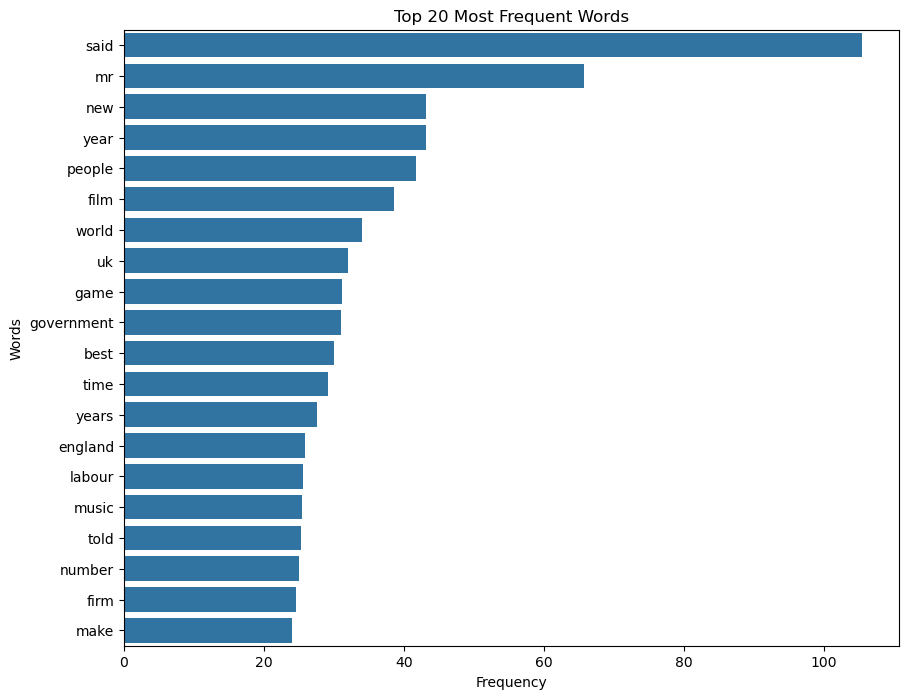

In [16]:
# Plot the top 20 most frequent words
plt.figure(figsize=(10, 8))
sns.barplot(x='Frequency', y='Term', data=freq_df.head(20))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


In [17]:
from sklearn.decomposition import NMF

# Initialize the NMF model
num_topics = 5  # Choose the number of topics
nmf_model = NMF(n_components=num_topics, random_state=42)

# Fit the model to the document-term matrix
W = nmf_model.fit_transform(dtm)
H = nmf_model.components_


In [18]:
# Get feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Print top terms for each topic
num_top_words = 10  # Number of top words to display for each topic
for topic_idx, topic in enumerate(H):
    top_terms_idx = topic.argsort()[-num_top_words:][::-1]
    top_terms = [feature_names[i] for i in top_terms_idx]
    print(f"Topic {topic_idx}:")
    print(" ".join(top_terms))
    print()


Topic 0:
people mobile music said technology phone software users digital microsoft

Topic 1:
game england win cup said wales ireland players play match

Topic 2:
mr labour blair election said party brown government minister prime

Topic 3:
film best awards award actor actress films director festival oscar

Topic 4:
said growth year market economy sales firm company shares bank



In [20]:
# Assign the topic with the highest score to each document
train_df['Topic'] = W.argmax(axis=1)

# Display the first few rows with assigned topics
train_df[['ArticleId', 'Category', 'Topic']].head()


,ArticleId,Category,Topic
0,1833,business,4
1,154,business,4
2,1101,business,4
3,1976,tech,0
4,917,business,4


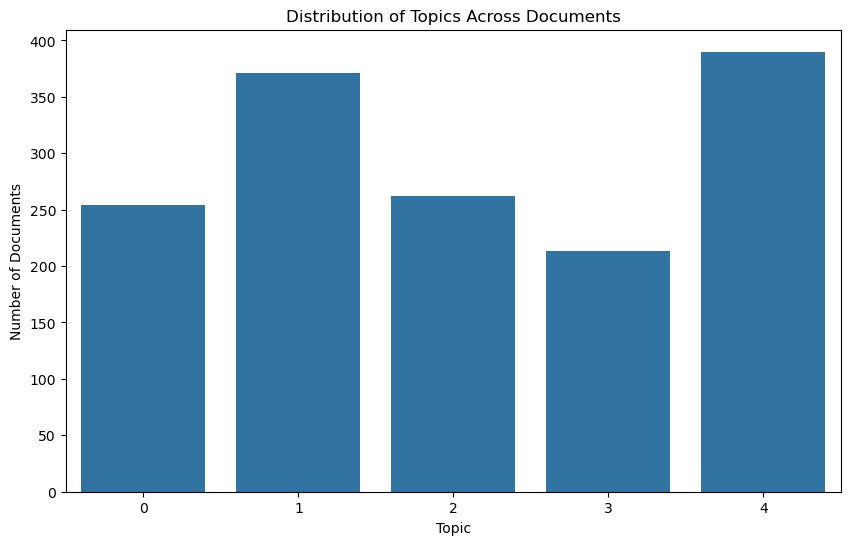

In [21]:
# Plot the distribution of topics across documents
plt.figure(figsize=(10, 6))
sns.countplot(x='Topic', data=train_df)
plt.title('Distribution of Topics Across Documents')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.show()
